In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## importing dataset

In [2]:
df_index=pd.read_csv('economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
## drop unecessary columns
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

## visualization

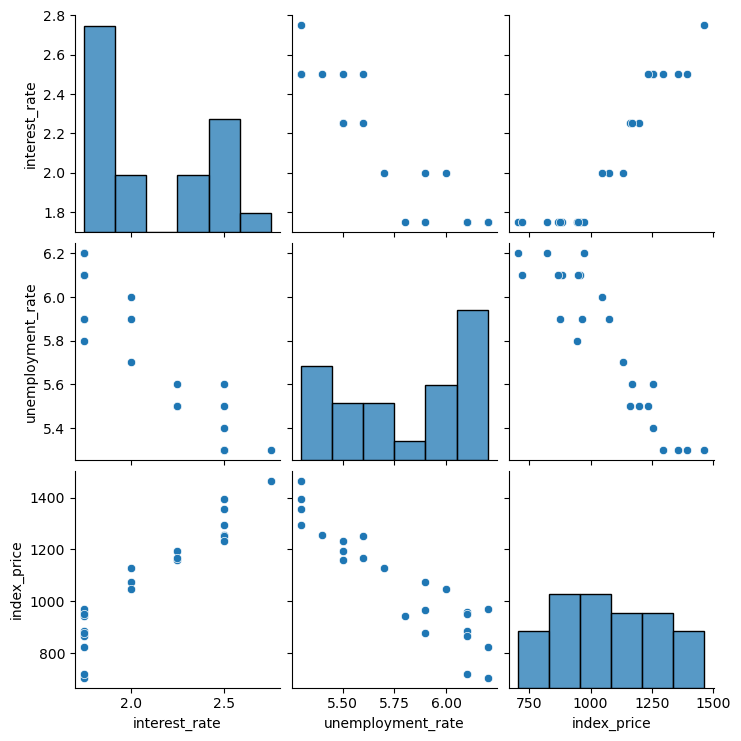

In [7]:
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

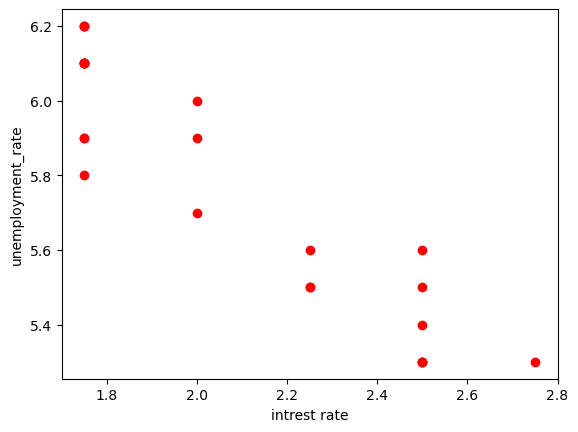

In [9]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel('intrest rate')
plt.ylabel('unemployment_rate')

## train test split

In [10]:
df_index.columns

Index(['interest_rate', 'unemployment_rate', 'index_price'], dtype='object')

In [11]:
X=df_index[['interest_rate','unemployment_rate']]

In [12]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
## another way
X=df_index.iloc[:,:-1]

In [14]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [15]:
y=df_index.iloc[:,-1]

In [16]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(lr,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [23]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [24]:
np.mean(validation_score)

-5914.828180162388

## prediction

In [25]:
y_pred=lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
print(mse)
rmse=np.sqrt(mse)
print(rmse)
mae=mean_absolute_error(y_test,y_pred)
print(mae)

8108.567426306604
90.04758423359621
73.80444932337097


In [27]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print(r2)

0.7591371539010257


In [28]:
N=len(y_test)
P=X_test.shape[1]
adj_r2=1-((1-r2)*(N-1)/(N-P-1))
print(adj_r2)

0.5985619231683761


## Assumption

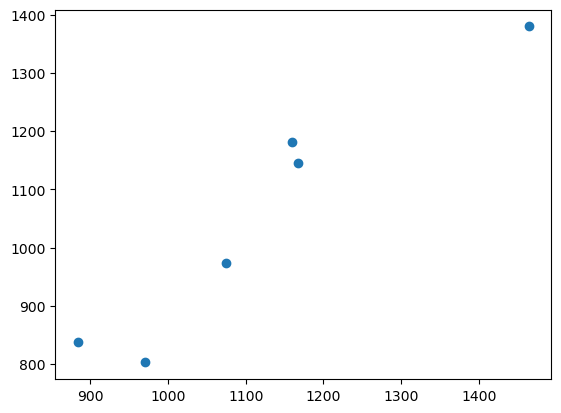

In [29]:
plt.scatter(y_test,y_pred)

In [30]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


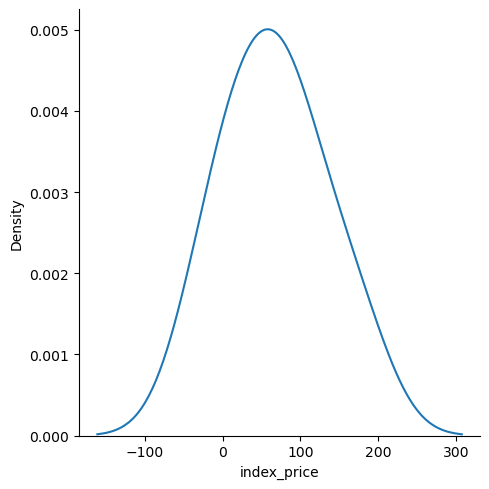

In [31]:
sns.displot(residuals,kind='kde')

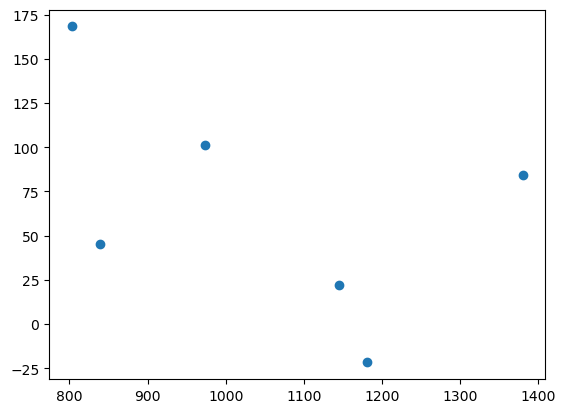

In [32]:
plt.scatter(y_pred,residuals)

## OLS for Linear REgression

In [33]:
import statsmodels.api as sm

In [34]:
model=sm.OLS(y_train,X_train).fit()

In [35]:
pred=model.predict(X_test)
print(pred)

[ 127.30223686 -250.70164745  326.390126   -214.91844842  -79.59130481
   91.51903783]


In [36]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                       0.754
Time:                        07:24:09   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\prasa\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)
